# Load Data

In [2]:
cd work/clean data

/home/jovyan/work/clean data


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

data = pd.read_csv('all_data.csv')

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


# Boxplot





/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


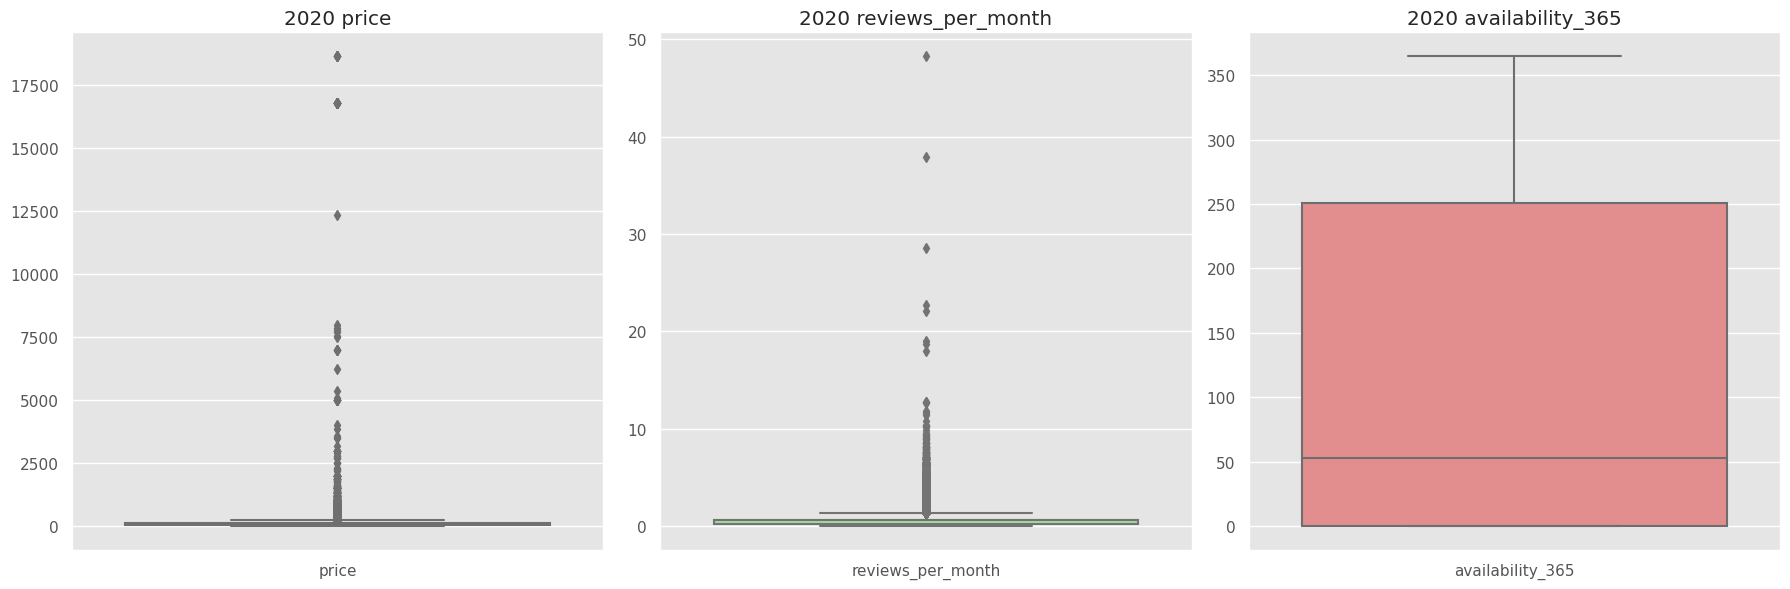

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


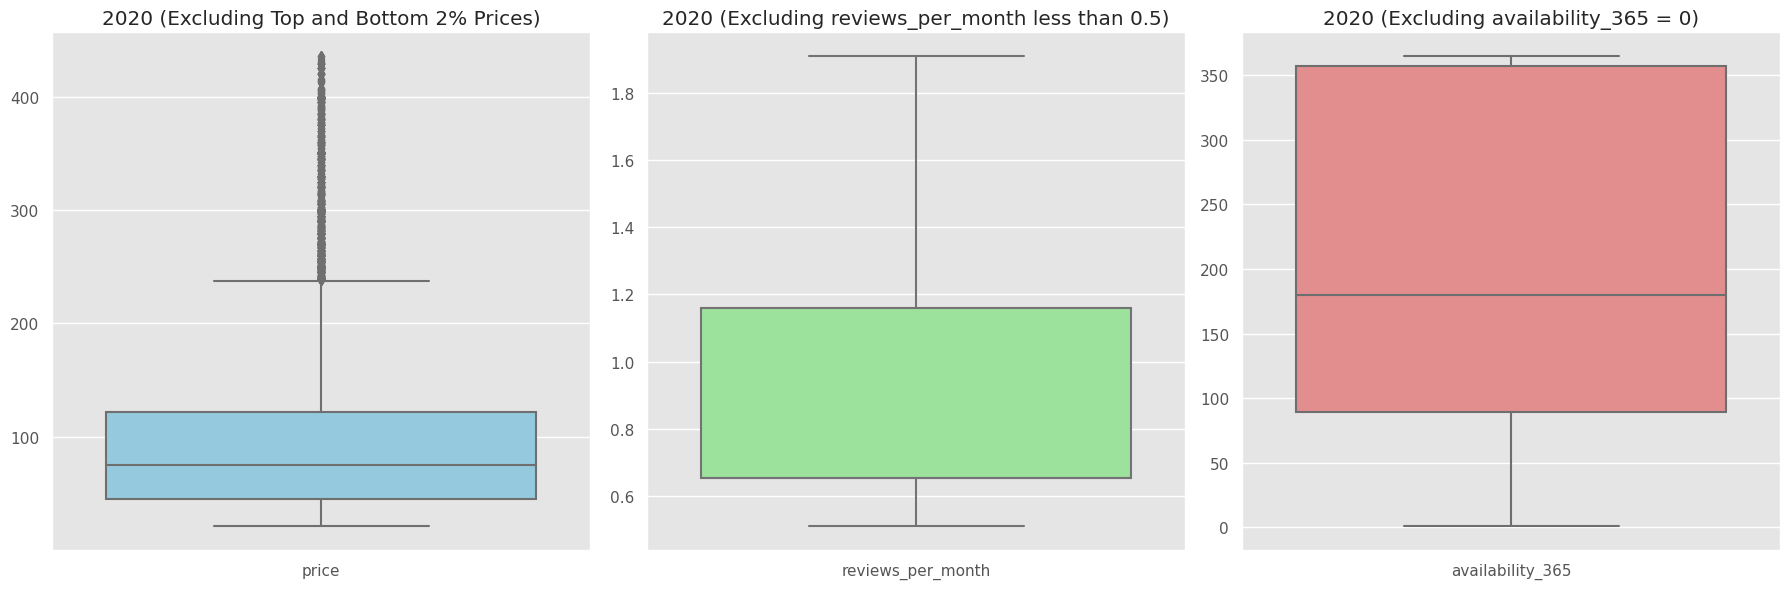

In [122]:
# Boxplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the year 2020
data_2020 = data[data['year'] == 2020]

# Create boxplots for 'price', 'reviews_per_month', and 'availability_365'
plt.figure(figsize=(18, 6))

# Boxplot for price
plt.subplot(1, 3, 1)
sns.boxplot(data_2020[['price']], color='skyblue')
plt.title('2020 price')

# Boxplot for reviews per month
plt.subplot(1, 3, 2)
sns.boxplot(data_2020[['reviews_per_month']], color='lightgreen')
plt.title('2020 reviews_per_month')

# Boxplot for availability per year
plt.subplot(1, 3, 3)
sns.boxplot(data_2020[['availability_365']], color='lightcoral')
plt.title('2020 availability_365')

plt.tight_layout()
plt.show()

# Calculate the 2% and 98% quantiles for price to identify outliers
lower_bound_price = data_2020['price'].quantile(0.02)
upper_bound_price = data_2020['price'].quantile(0.98)

# Filter out outliers
filtered_data = data_2020[
    (data_2020['price'] > lower_bound_price) & 
    (data_2020['price'] < upper_bound_price) 
]

filtered_data1 = filtered_data[(filtered_data['reviews_per_month'] > 0.5)]
filtered_data2 = filtered_data1[(filtered_data1['availability_365'] > 0)]

# Create boxplots for filtered data
plt.figure(figsize=(18, 6))

# Boxplot for filtered price data
plt.subplot(1, 3, 1)
sns.boxplot(filtered_data2[['price']], color='skyblue')
plt.title('2020 (Excluding Top and Bottom 2% Prices)')

# Boxplot for filtered reviews per month data
plt.subplot(1, 3, 2)
sns.boxplot(filtered_data2[['reviews_per_month']], color='lightgreen', sym='')
plt.title('2020 (Excluding reviews_per_month less than 0.5)')

# Boxplot for filtered availability per year data
plt.subplot(1, 3, 3)
sns.boxplot(filtered_data2[['availability_365']], color='lightcoral')
plt.title('2020 (Excluding availability_365 = 0)')

plt.tight_layout()
plt.show()


# Clean Data

In [52]:
lower_bound_price = data['price'].quantile(0.02)
upper_bound_price = data['price'].quantile(0.98)

clean_data = data[
    (data['price'] > lower_bound_price) & 
    (data['price'] < upper_bound_price) 
]


clean_data1=clean_data[(clean_data['reviews_per_month'] > 0.5)]
clean_data2=clean_data1[(clean_data1['availability_365'] > 0)]

clean_data

,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,longitude,last_review,neighbourhood,reviews_per_month,year
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.444730,Private room,35.0,278,47,-0.379000,2019-11-06,Richmond upon Thames,2.270000,2019
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.473980,Entire home/apt,103.0,317,8,-0.215310,2019-11-06,Hammersmith and Fulham,0.510000,2019
3,57607790,29060134,1,Recently renovated fabulous four bedroom house,14,51.527160,Entire home/apt,85.0,346,5,-0.441640,2019-11-06,Hillingdon,0.400000,2019
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.591180,Entire home/apt,85.0,139,16,-0.166700,2019-11-06,Barnet,1.520000,2019
5,234271729,31300930,1,ALPINE GUEST HOUSE. Detached & self-contained,1,51.379600,Private room,32.0,140,50,-0.275610,2019-11-06,Kingston upon Thames,5.170000,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390061,498408783,973781286754517248,2,Rental unit in Greater London · ★New · 1 bedro...,2,51.514860,Entire home/apt,275.0,239,0,-0.135980,2023-08-20,Westminster,1.014894,2023
390062,36645347,973801695874775296,1,Rental unit in Greater London · ★New · 1 bedro...,3,51.459042,Entire home/apt,145.0,88,0,-0.055458,2023-08-20,Southwark,1.014894,2023
390063,340514057,973811685656289792,1,Home in Greater London · ★New · 1 bedroom · 5 ...,1,51.406100,Private room,160.0,80,0,-0.236126,2023-08-20,Merton,1.014894,2023
390064,439074505,973882998775927936,170,Home in Greater London · ★New · 5 bedrooms · 5...,1,51.450997,Entire home/apt,680.0,364,0,-0.444319,2023-08-20,Hounslow,1.014894,2023


In [59]:
room_type_share_by_year = clean_data2.groupby(['year', 'room_type']).size() / clean_data2.groupby('year').size()
room_type_share_by_year

year  room_type      
2019  Entire home/apt    0.565310
      Hotel room         0.014142
      Private room       0.416041
      Shared room        0.004507
2020  Entire home/apt    0.546844
      Hotel room         0.007736
      Private room       0.438656
      Shared room        0.006764
2021  Entire home/apt    0.563600
      Hotel room         0.004641
      Private room       0.423069
      Shared room        0.008691
2022  Entire home/apt    0.622429
      Hotel room         0.002093
      Private room       0.369236
      Shared room        0.006242
2023  Entire home/apt    0.644311
      Hotel room         0.001476
      Private room       0.349883
      Shared room        0.004331
dtype: float64

In [69]:
count_by_year = clean_data2.groupby('year')['id'].count()
count_by_year

year
2019    41931
2020    26759
2021    23703
2022    27714
2023    41331
Name: id, dtype: int64

In [70]:
average_price_by_year = clean_data2.groupby('year')['price'].mean()
average_price_by_year

year
2019    116.851995
2020    104.631264
2021    122.349956
2022    160.172162
2023    158.314050
Name: price, dtype: float64

# Histogram

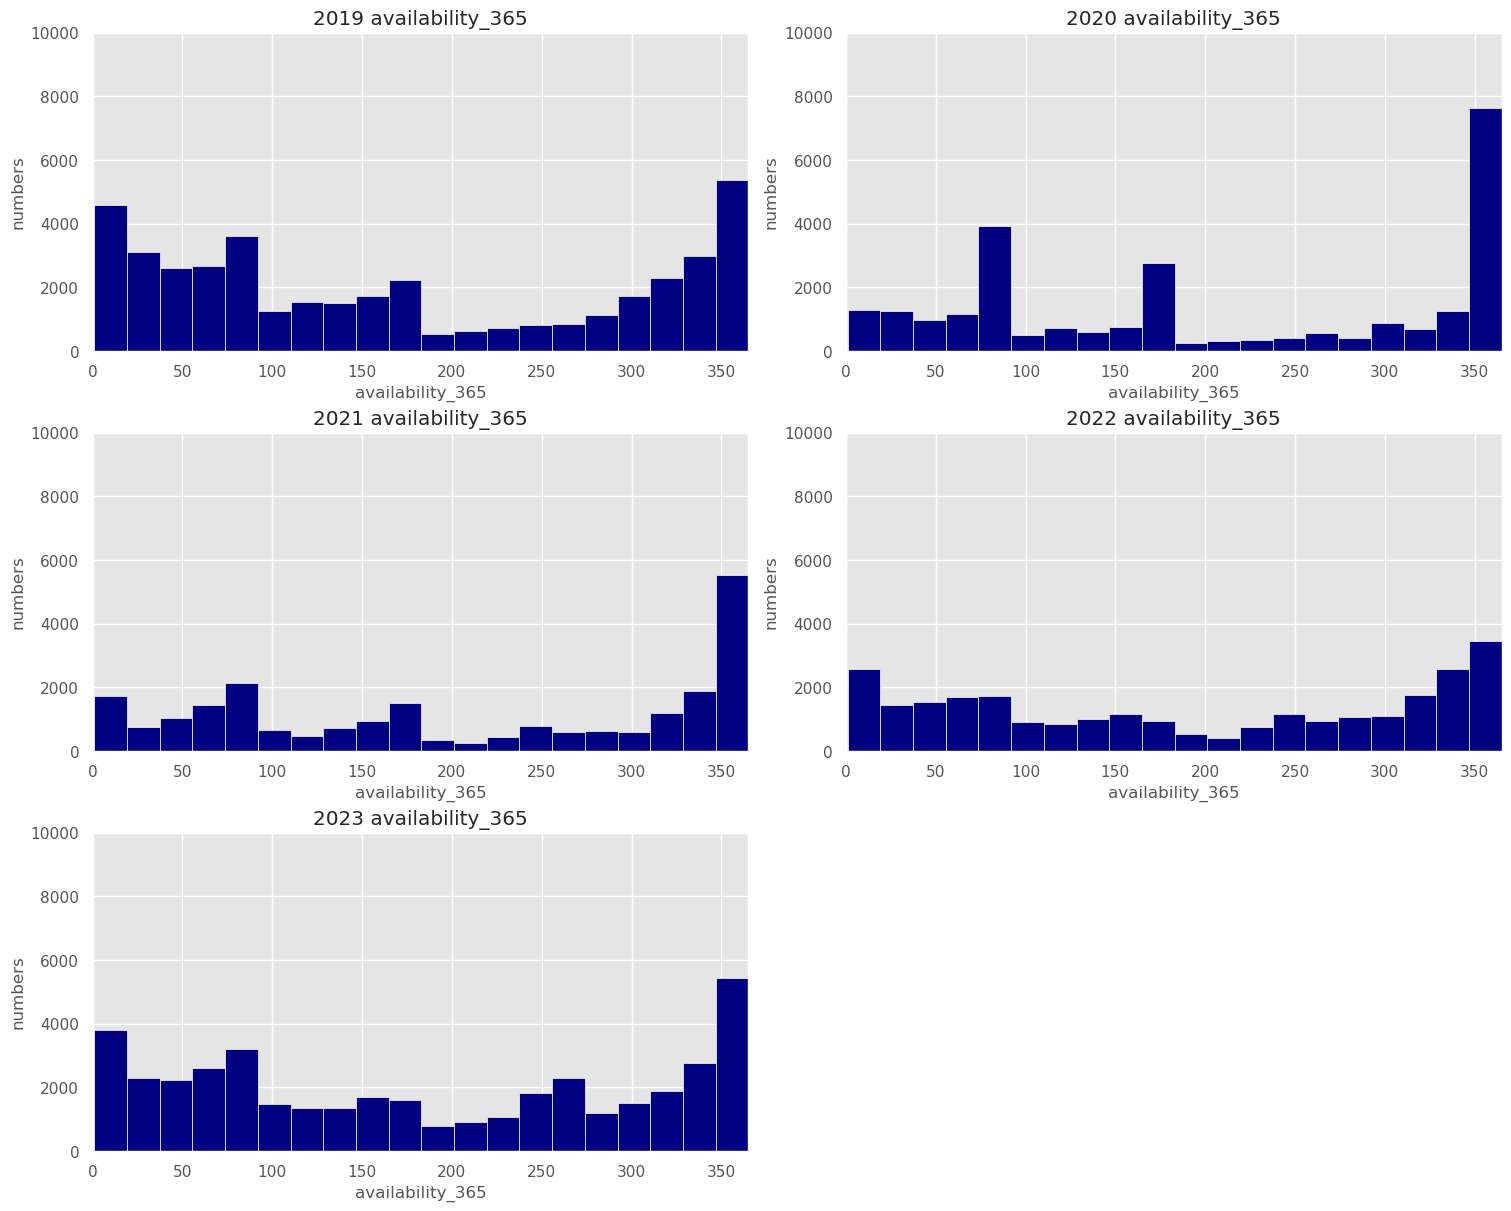

In [123]:
# Histogram

# Set the overall style of the chart to ggplot
plt.style.use('ggplot')

# Prepare data: Separate data for each year
data_by_year = {
    2019: clean_data2[clean_data2['year'] == 2019]['availability_365'].dropna(),
    2020: clean_data2[clean_data2['year'] == 2020]['availability_365'].dropna(),
    2021: clean_data2[clean_data2['year'] == 2021]['availability_365'].dropna(),
    2022: clean_data2[clean_data2['year'] == 2022]['availability_365'].dropna(),
    2023: clean_data2[clean_data2['year'] == 2023]['availability_365'].dropna()
}

# Set the number of bins for the histogram
bins = 20

# Create a histogram
fig, axs = plt.subplots(3, 2, figsize=(15, 12), constrained_layout=True)

# Remove the bottom-right subplot (empty)
axs[-1, -1].remove()

# Create a histogram for each year
for i, (year, prices) in enumerate(data_by_year.items()):
    ax = axs[i//2, i%2]
    ax.hist(prices, bins=bins, color='navy', edgecolor='white')
    ax.set_title(f'{year} availability_365')
    ax.set_xlabel('availability_365')
    ax.set_ylabel('numbers')
    ax.set_ylim([0, 10000])
    ax.set_xlim([0, 365])
    ax.grid(True)

# Display the chart
plt.show()


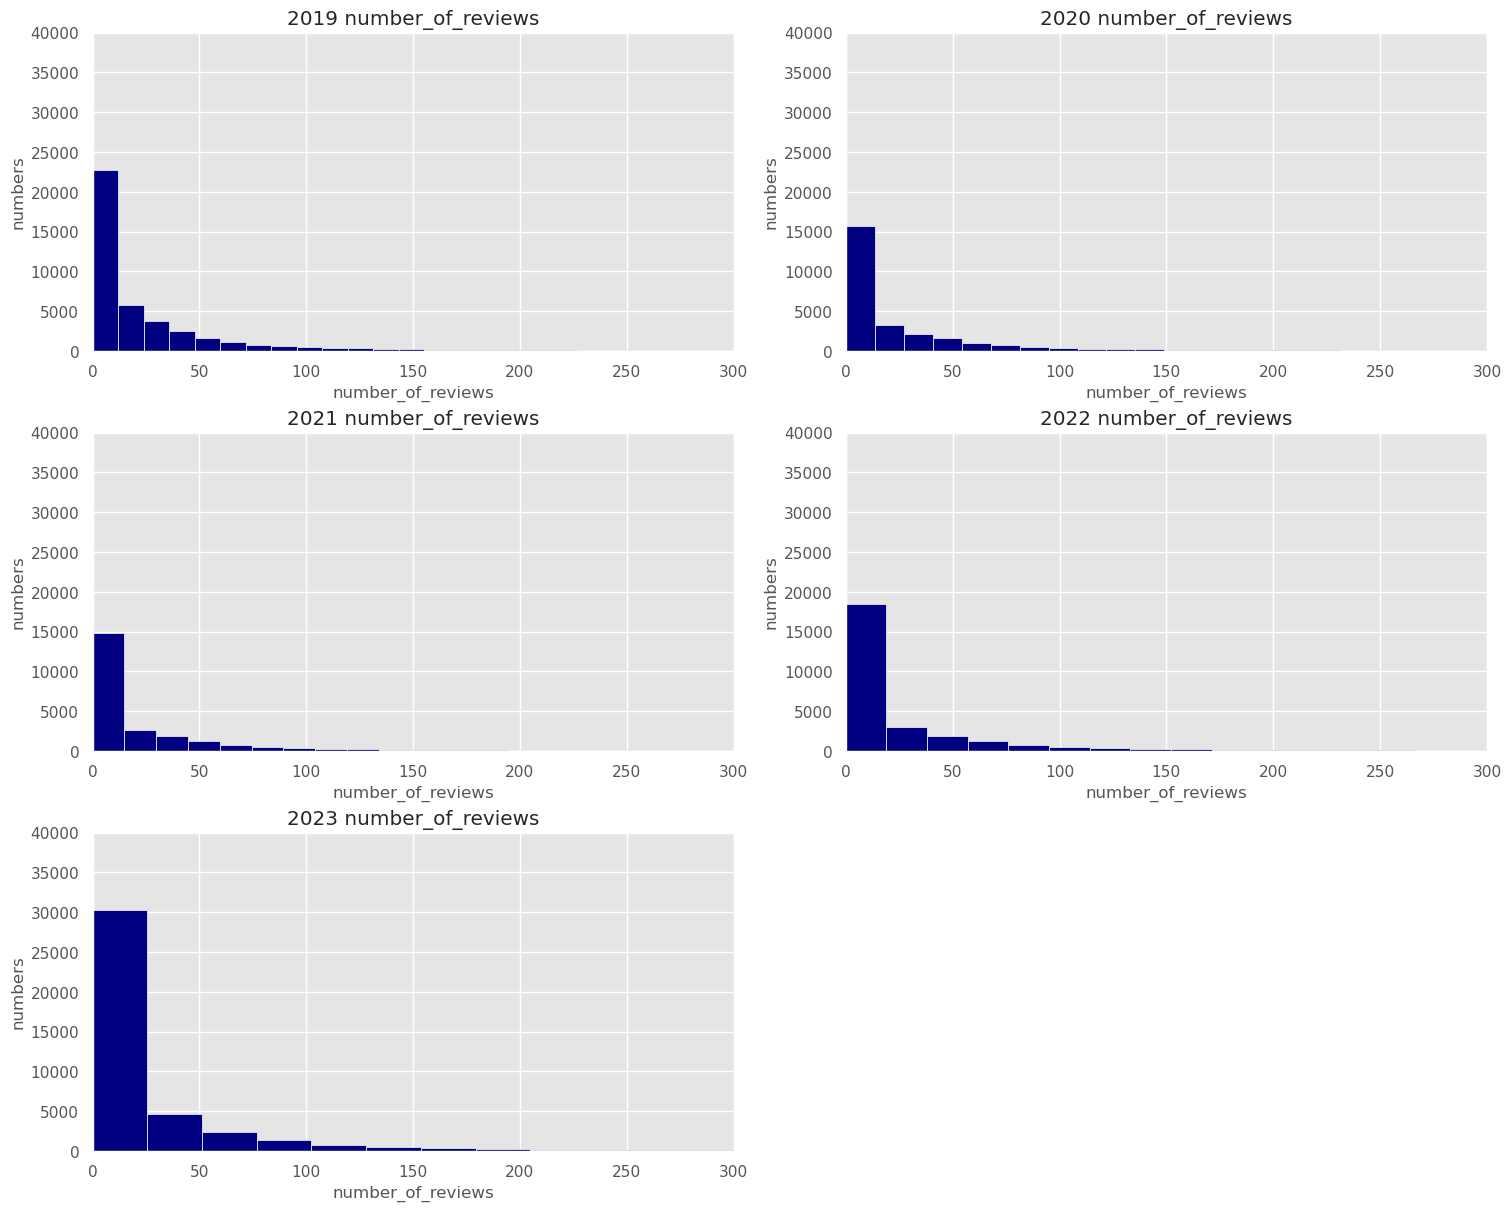

In [114]:
#histogram

# Set the overall style of the chart to ggplot
plt.style.use('ggplot')

# Prepare data: Separate data for each year
data_by_year = {
    2019: clean_data2[clean_data2['year'] == 2019]['number_of_reviews'].dropna(),
    2020: clean_data2[clean_data2['year'] == 2020]['number_of_reviews'].dropna(),
    2021: clean_data2[clean_data2['year'] == 2021]['number_of_reviews'].dropna(),
    2022: clean_data2[clean_data2['year'] == 2022]['number_of_reviews'].dropna(),
    2023: clean_data2[clean_data2['year'] == 2023]['number_of_reviews'].dropna()
}

# Set the number of bins for the histogram
bins = 60

# Create a histogram
fig, axs = plt.subplots(3, 2, figsize=(15, 12), constrained_layout=True)

axs[-1, -1].remove()

# Create a histogram for each year
for i, (year, prices) in enumerate(data_by_year.items()):
    ax = axs[i//2, i%2]
    ax.hist(prices, bins=bins, color='navy', edgecolor='white')
    ax.set_title(f'{year} number_of_reviews')
    ax.set_xlabel('number_of_reviews')
    ax.set_ylabel('numbers')
    ax.set_ylim([0, 40000])
    ax.set_xlim([0, 300])
    ax.grid(True)

# Display the chart 
plt.show()

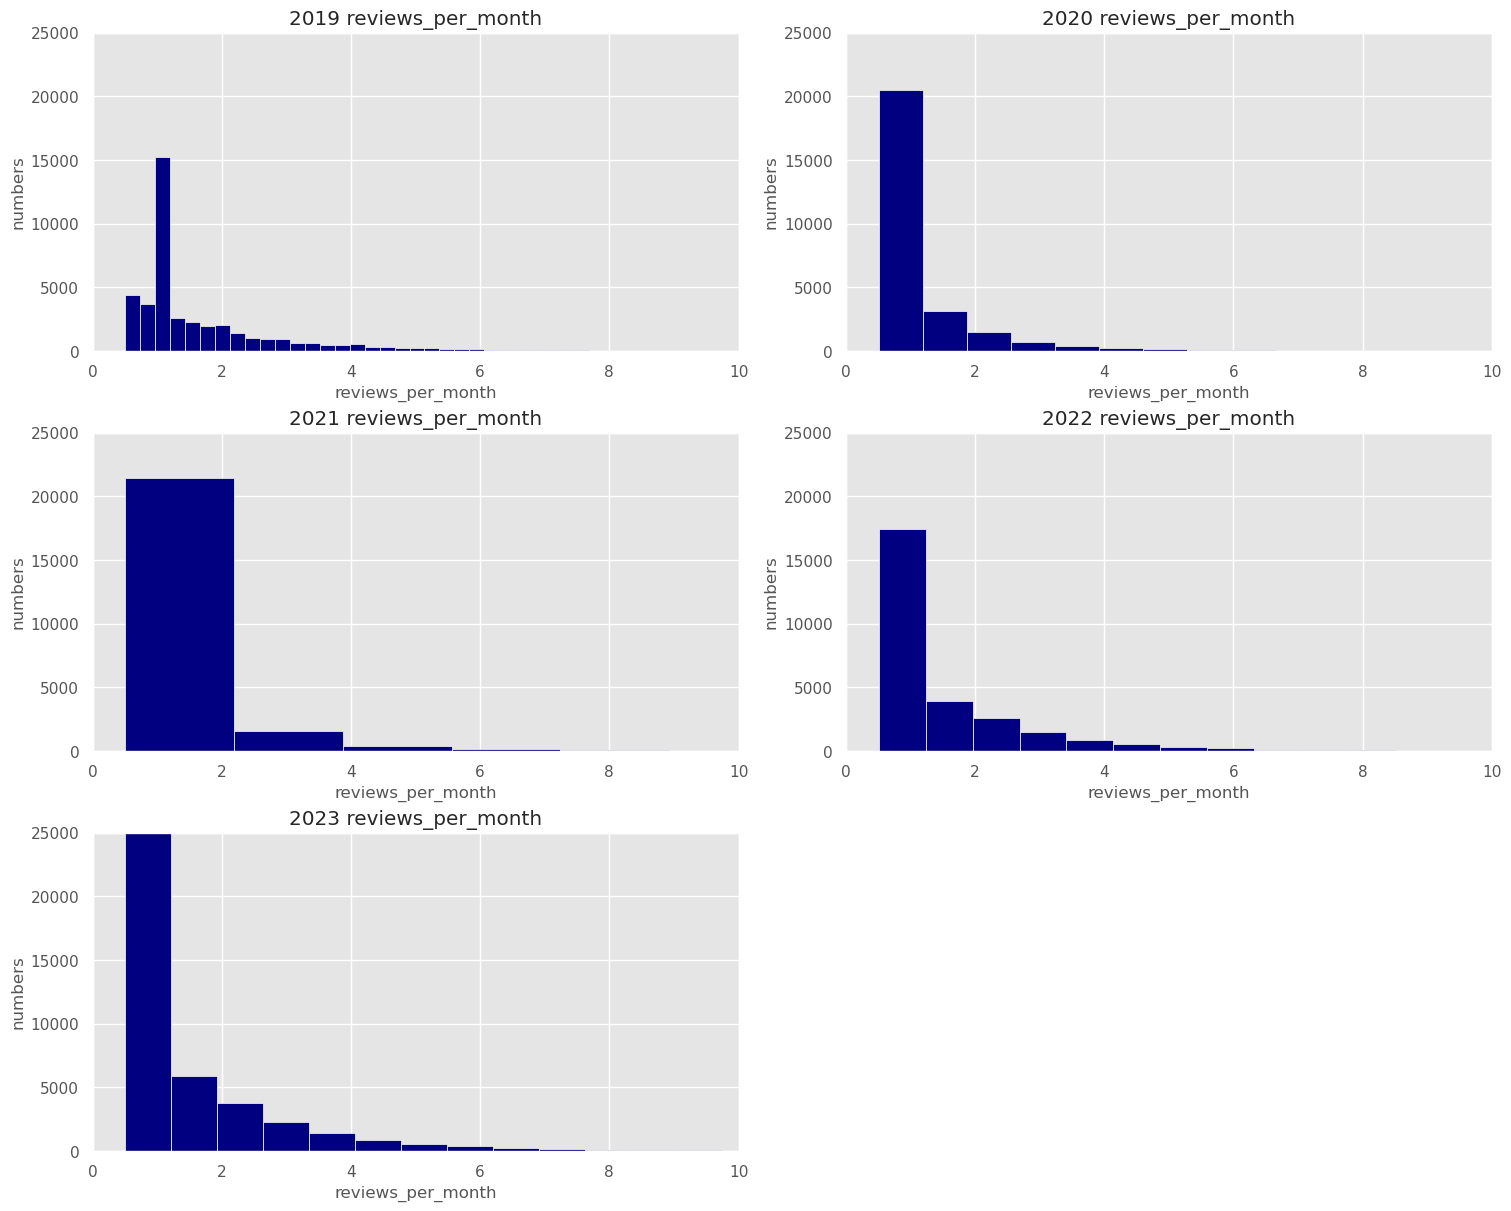

In [115]:
#histogram

# Set the overall style of the chart to ggplot
plt.style.use('ggplot')

# Prepare data: Separate data for each year
data_by_year = {
    2019: clean_data2[clean_data2['year'] == 2019]['reviews_per_month'].dropna(),
    2020: clean_data2[clean_data2['year'] == 2020]['reviews_per_month'].dropna(),
    2021: clean_data2[clean_data2['year'] == 2021]['reviews_per_month'].dropna(),
    2022: clean_data2[clean_data2['year'] == 2022]['reviews_per_month'].dropna(),
    2023: clean_data2[clean_data2['year'] == 2023]['reviews_per_month'].dropna()
}

# Set the number of bins for the histogram
bins =70

# Create a histogram
fig, axs = plt.subplots(3, 2, figsize=(15, 12), constrained_layout=True)

axs[-1, -1].remove()

# Create a histogram for each year
for i, (year, prices) in enumerate(data_by_year.items()):
    ax = axs[i//2, i%2]
    ax.hist(prices, bins=bins, color='navy', edgecolor='white')
    ax.set_title(f'{year} reviews_per_month')
    ax.set_xlabel('reviews_per_month')
    ax.set_ylabel('numbers')
    ax.set_ylim([0, 25000])
    ax.set_xlim([0, 10])
    ax.grid(True)


# Display the chart
plt.show()


# Annual Changes

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

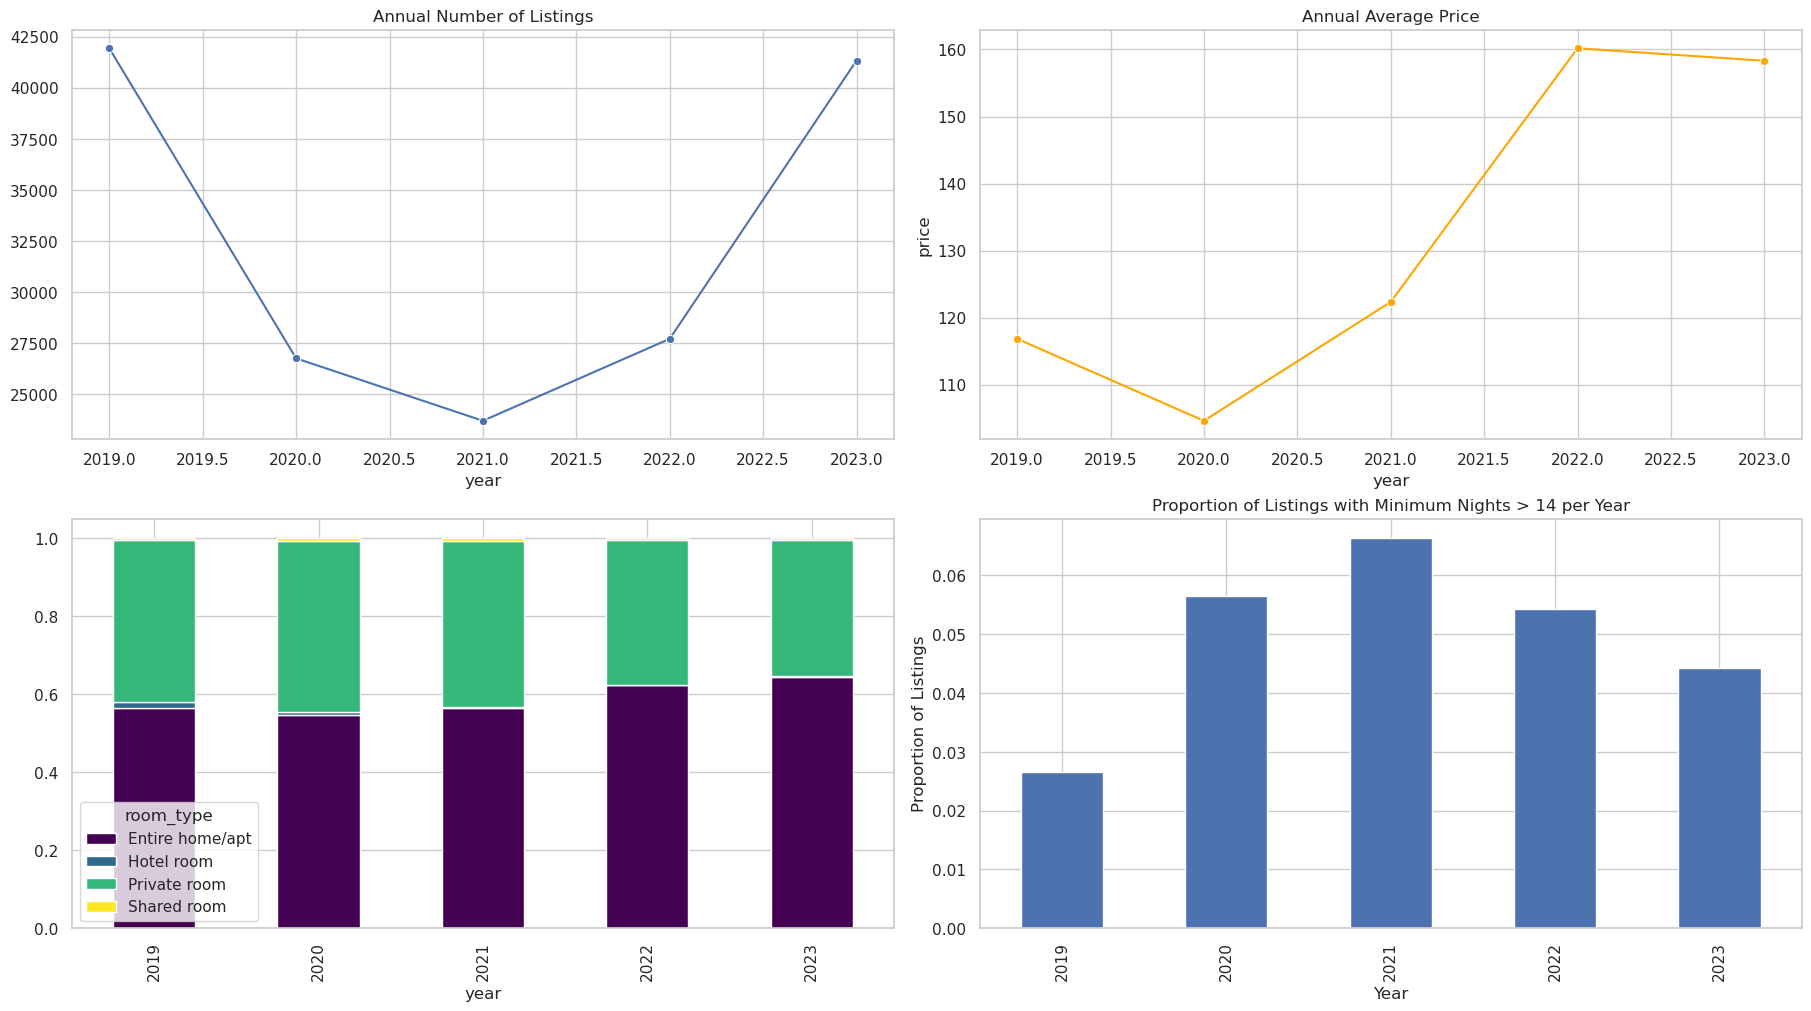

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation and Analysis
# Analysis of listing counts and price fluctuations
annual_listing_counts = clean_data2.groupby('year').size()
annual_price_means = clean_data2.groupby('year')['price'].mean()

# Analysis of market share of room types
room_type_annual_distribution = clean_data2.groupby(['year', 'room_type']).size().unstack(fill_value=0)
room_type_annual_shares = room_type_annual_distribution.div(room_type_annual_distribution.sum(axis=1), axis=0)

# Set the chart style
sns.set(style="whitegrid")

# Create the chart layout
fig, axes = plt.subplots(2, 2, figsize=(18, 10), constrained_layout=True)

# Charts for listing counts and price fluctuations
# Line chart - Trends in the number of listings and average prices
sns.lineplot(data=annual_listing_counts, ax=axes[0, 0], marker='o')
sns.lineplot(data=annual_price_means, ax=axes[0, 1], color='orange', marker='o')

axes[0, 0].set_title('Annual Number of Listings')
axes[0, 1].set_title('Annual Average Price')

# Chart for room type market shares
# Stacked bar chart - Changes in market shares of different room types
room_type_annual_shares.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='viridis')

# Data Analysis
# Calculate the total number of listings and listings over 14 nights per year
yearly_stats = clean_data2.groupby('year').agg(
    Total_Listings=pd.NamedAgg(column='minimum_nights', aggfunc='size'),
    Listings_Over_14_Nights=pd.NamedAgg(column='minimum_nights', aggfunc=lambda x: (x > 14).sum())
)

# Calculate the proportion of listings with minimum nights over 14
yearly_stats['Proportion_Over_14_Nights'] = yearly_stats['Listings_Over_14_Nights'] / yearly_stats['Total_Listings']

# Plot the results
yearly_stats['Proportion_Over_14_Nights'].plot(kind='bar')
plt.title('Proportion of Listings with Minimum Nights > 14 per Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Listings')

# Display the charts
plt.show()
